<a href="https://colab.research.google.com/github/jazar0/ThermalCameraCapture/blob/main/Combined_Spill_NoSpill_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Code with pretrained models for water_noWater dataset
```
train
    + water
    + noWater
validation
    + water
    + noWater
test
    + water
    + noWater
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
#from PIL import Image
from keras.preprocessing.image import load_img
from keras.utils import image_dataset_from_directory
from keras import optimizers
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Directories
b_dir = '/content/drive/MyDrive/Data87/Combined'
train_dir = b_dir+'/train'
vali_dir = b_dir+'/validation'


train_noWater_dir =b_dir+'/train/no-spill'
train_water_dir =b_dir+'/train/spill'
vali_noWater_dir = b_dir+'/validation/no-spill'
vali_water_dir = b_dir+'/validation/spill'

In [ ]:
import os
print('total training noWater images:', len(os.listdir(train_noWater_dir)))
print('total training water images:', len(os.listdir(train_water_dir)))
print('total validation noWater images:', len(os.listdir(vali_noWater_dir  )))
print('total validation water images:', len(os.listdir(vali_water_dir )))

total training noWater images: 356
total training water images: 249
total validation noWater images: 76
total validation water images: 53


In [ ]:

#Create image dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(1024, 384),
    batch_size=8)

validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(1024, 384),
    batch_size=8)


Found 605 files belonging to 2 classes.
Found 129 files belonging to 2 classes.


In [ ]:
noWater_img = os.listdir(train_noWater_dir)
water_img = os.listdir(train_water_dir)

In [ ]:
print(noWater_img)

['20240305_165038_combined.png', '20240710_101728_combined.png', '20240305_164744_combined.png', '20240710_102520_combined.png', '20240619_111543_combined.png', '20240710_102334_combined.png', '20240710_101944_combined.png', '20240619_111447_combined.png', '20240710_103058_combined.png', '20240626_111405_combined.png', '20240710_102811_combined.png', '20240626_111503_combined.png', '20240717_125207_combined.png', '20240619_110851_combined.png', '20240626_111225_combined.png', '20240305_164723_combined.png', '20240304_144159_combined.png', '20240710_110942_combined.png', '20240619_110955_combined.png', '20240717_125530_combined.png', '20240626_111207_combined.png', '20240619_110033_combined.png', '20240710_111247_combined.png', '20240305_165030_combined.png', '20240626_112531_combined.png', '20240717_125519_combined.png', '20240626_110444_combined.png', '20240710_102652_combined.png', '20240710_111001_combined.png', '20240305_165059_combined.png', '20240304_142418_combined.png', '202407

# Showing the images

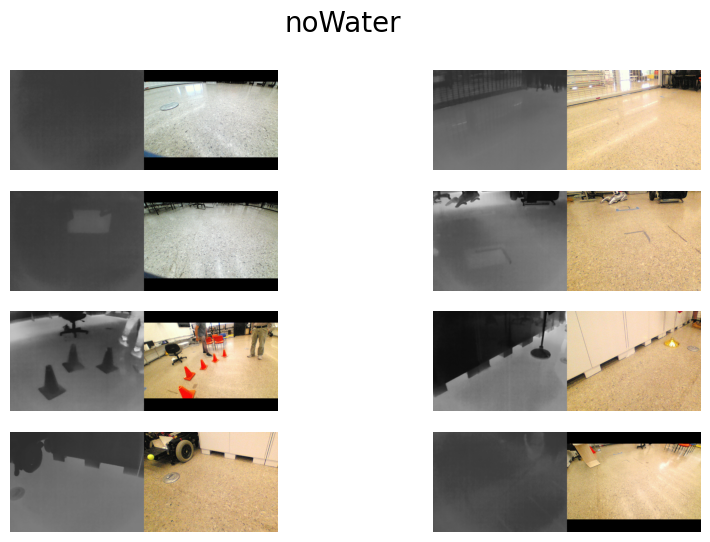

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.imshow(load_img(train_noWater_dir + '/'+ noWater_img [i]), cmap='gray')
    plt.suptitle("noWater",fontsize=20)
    plt.axis('off')

plt.show()

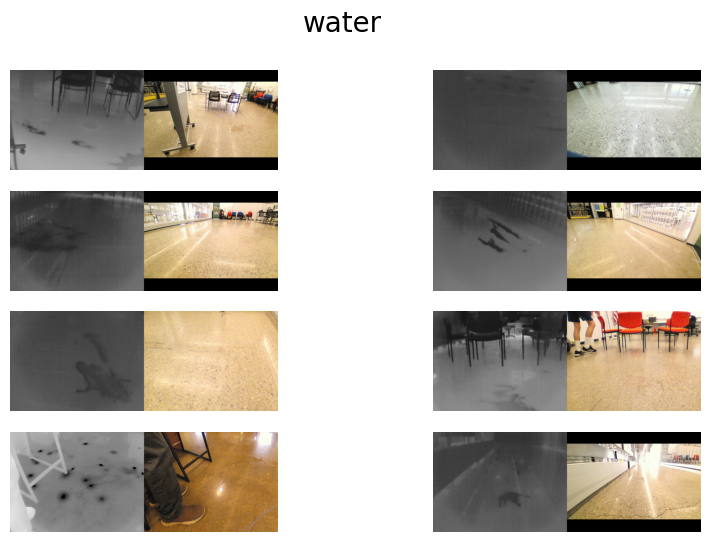

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.imshow(load_img(train_water_dir + '/'+ water_img [i]), cmap='gray')
    plt.suptitle("water",fontsize=20)
    plt.axis('off')

plt.show()

In [ ]:
#conv_base = keras.applications.vgg16.VGG16(
conv_base = keras.applications.vgg19.VGG19(
#conv_base = keras.applications.resnet50.ResNet50(
#conv_base = keras.applications.ResNet50V2(
#conv_base = keras.applications.EfficientNetB3(
#conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(1024, 384, 3))

conv_base.trainable = True

for layer in conv_base.layers[:-5]:
  layer.trainable = False

# Adding a data augmentation stage and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.01),
        layers.RandomZoom(0.01),
        layers.RandomContrast(0.01)
    ]
)

inputs = keras.Input(shape=(1024, 384, 3))
x = data_augmentation(inputs)
#x = keras.applications.vgg16.preprocess_input(x)
x = keras.applications.vgg19.preprocess_input(x)
#x = keras.applications.resnet50.preprocess_input(x)
#x = keras.applications.resnet_v2.preprocess_input(x)
#x = keras.applications.efficientnet.preprocess_input(x)
#x = keras.applications.inception_v3.preprocess_input(x)

x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1024, 384, 3)   │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1024, 384, 3)   │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 1024, 384)      │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 1024, 384)      │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 1024, 384)      │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 1024, 384, 3)   │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1024, 384, 3)   │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg19 (Functional)        │ (None, 32, 12, 512)    │     20,024,384 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 196608)         │              0 │ vgg19[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │     50,331,904 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            257 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 70,356,545 (268.39 MB)

 Trainable params: 59,771,393 (228.01 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/Model/best_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 887ms/step - accuracy: 0.5824 - loss: 2.5297 - val_accuracy: 0.7674 - val_loss: 0.6352
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 119s 786ms/step - accuracy: 0.8933 - loss: 0.3579 - val_accuracy: 0.8527 - val_loss: 0.4475
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 75s 696ms/step - accuracy: 0.9497 - loss: 0.1482 - val_accuracy: 0.8915 - val_loss: 0.5267
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 86s 749ms/step - accuracy: 0.9595 - loss: 0.1146 - val_accuracy: 0.9302 - val_loss: 0.1792
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 698ms/step - accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.9380 - val_loss: 0.3021
Epoch 6/20


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [ ]:
test_dir = b_dir+'/test'
test_noWater_dir = test_dir+'/no-spill/'
test_water_dir = test_dir+'/spill/'


In [ ]:
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(1024, 384),
    batch_size=2,
    shuffle=False
)


In [ ]:
loaded_model = keras.models.load_model("/content/drive/MyDrive/Model/best_model.keras")
test_loss, test_acc = loaded_model.evaluate(test_dataset)